# <font color='Blue'>Deep Learning - Multiple Classification</font>

# <font color='Blue'>Classification</font>

Classification is the problem of identifying to which of a set of categories or label, a new observation belongs. Classification of the new observation is on the basis of a training set of data containing observations (or instances) whose category membership is known.

Classification problems are an important category of problems in analytics in which the outcome variable or response variable 
takes discrete values. Primary objective of a classification model is to predict the probability of an observation belonging 
to a class, known as class probability. Few examples of classificiation problems are
  
  1. A bank would like to classify its customers as high-risk and low-risk
  2. E-commerce company would like to predict if a customer would churn or not
  3. Health service provider may like to classify a patient as positive or negative
  4. Predicting whether India will win world-cup or not
  5. Classifying sentiments of customers as positive or negative
  6. Based on image of the plant, predict if the plant is infected with a specific diease or not
  
Classification problems may have binary or multiple outcomes and so are called as binary or multinomial classification. Some
techniques for solving classification problems are logistic regression, decision trees, naive-bayes, support vector machines, 
neural network, kNN etc.
  
We shall discuss logistic regression, decision trees, naive-bayes.

## <font color='Blue'>Learning Objectives</font>
  1. Apply Deep Learning to a Binary Classification Problem

## <font color='Blue'>Importing Libraries</font>

In [83]:
import keras
keras.__version__

'2.3.1'

In [84]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [85]:
np.set_printoptions(suppress=True)

### <font color='Blue'>1.0 Dataset </font>

The Goal is predict the plater position using player information.
Source: https://www.kaggle.com/karangadiya/fifa19

### <font color='Blue'>1.1 Loading Data</font>

In [86]:
data_df = pd.read_csv( "data.csv" )
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [87]:
data_df.iloc[0:5,0:14]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right


### <font color='Blue'>1.2 Removing Rows with missing Data in Positions</font>

In [88]:
na = pd.notnull(data_df["Position"])
data_df = data_df[na]
data_df.shape

(18147, 88)

### <font color='Blue'>1.3 Finding the number of Positions</font>
     Position variable stands for the position of the players.
     There are too many positions which will be categorized as forward, midfielder or defender

In [89]:
data_df.Position.value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

### <font color='Blue'>1.4 Categorizing Positions</font>

In [90]:
forward = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
midfielder = ["CM","RCM","LCM", "CDM","RDM","LDM", "CAM", "LAM", "RAM", "RM", "LM"]
defender = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]

In [91]:
data_df.loc[data_df["Position"] == "GK", "Position"] = 0
data_df.loc[data_df["Position"].isin(defender), "Position"] = 1
data_df.loc[data_df["Position"].isin(midfielder), "Position"] = 2
data_df.loc[data_df["Position"].isin(forward), "Position"] = 3

### <font color='Blue'>1.4.1 Getting the Class Labels and Counts</font>

In [92]:
data_df.Position.value_counts()

2    6838
1    5866
3    3418
0    2025
Name: Position, dtype: int64

In [93]:
Y = data_df.Position

### <font color='Blue'>1.5 Extracting Features </font>

In [94]:
X_features = ['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
               'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
               'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
               'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
               'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
               'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
               'GKKicking', 'GKPositioning', 'GKReflexes']

In [95]:
encoded_data_df = pd.get_dummies( data_df[X_features], drop_first = True )
list(encoded_data_df.columns)

['Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'StandingTackle',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes']

In [96]:
encoded_data_df

,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,38.0,40.0,49.0,25.0,42.0,30.0,34.0,45.0,43.0,54.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,52.0,52.0,43.0,36.0,39.0,32.0,20.0,25.0,40.0,41.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,40.0,46.0,38.0,38.0,45.0,38.0,27.0,28.0,44.0,70.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,50.0,39.0,42.0,40.0,51.0,34.0,32.0,32.0,52.0,61.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [97]:
X = encoded_data_df

In [98]:
Y = pd.get_dummies( Y, drop_first = False )

In [99]:
Y

,0,1,2,3
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
18202,0,0,1,0
18203,0,0,0,1
18204,0,0,0,1
18205,0,0,0,1


### <font color='Blue'>1.6 Splitting into Train and Validation Sets </font>

In [100]:
train_data, test_data, train_targets, test_targets = train_test_split( X , Y, train_size = 0.7, random_state = 42 )

### <font color='Blue'>1.7 Converting Data Frame into Array </font>

#### <font color='Blue'>1.7.1 Converting Train and Test Targets into Array </font>

In [101]:
train_targets = train_targets.to_numpy()
test_targets = test_targets.to_numpy()

In [102]:
train_targets

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [103]:
test_targets

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0]], dtype=uint8)

#### <font color='Blue'>1.7.2 Converting Train and Test Data into Array </font>

In [104]:
train_data = train_data.to_numpy()
test_data = test_data.to_numpy()

In [105]:
train_data.shape

(12702, 33)

In [106]:
test_data.shape

(5445, 33)

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to 
automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

### <font color='Blue'>1.8 Data Normalization </font>

In [107]:
mean = train_data.mean(axis=0)
std  = train_data.std(axis=0)

train_data = train_data - mean
train_data = train_data/std

test_data = test_data - mean
test_data = test_data/std

### <font color='Blue'>1.9 Building (Defining our Network) </font>

<img src="Activation Function Last Layer.jpg" width=800 height = 600>   

In [108]:
from keras import models
from keras import layers

In [109]:
from keras import backend as K
K.clear_session()

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',
                           input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### <font color='Blue'>What did we change compared to Binary Classification Problem ?</font>

We need to pick a loss function and an optimizer. Since we are facing a multi-class classification problem and the output of our network 
is a probability (we end our network with a single-unit layer with a softmax activation), is it best to use the `categorical_crossentropy` loss. 
Crossentropy is a quantity from the field of Information Theory, that measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the `rmsprop` optimizer and the `categorical_crossentropy` loss function. 
Note that we will also monitor accuracy during training.

### <font color='Blue'>1.8 Fitting our Model </font>

In [110]:
hist = model.fit(train_data, train_targets,
                             epochs=100,
                             batch_size=32,verbose=2,
                             validation_data=(test_data, test_targets))

Train on 12702 samples, validate on 5445 samples
Epoch 1/100
 - 1s - loss: 0.7191 - accuracy: 0.7472 - val_loss: 0.3943 - val_accuracy: 0.8380
Epoch 2/100
 - 1s - loss: 0.3540 - accuracy: 0.8511 - val_loss: 0.3364 - val_accuracy: 0.8591
Epoch 3/100
 - 1s - loss: 0.3232 - accuracy: 0.8651 - val_loss: 0.3199 - val_accuracy: 0.8670
Epoch 4/100
 - 1s - loss: 0.3103 - accuracy: 0.8717 - val_loss: 0.3125 - val_accuracy: 0.8687
Epoch 5/100
 - 1s - loss: 0.3041 - accuracy: 0.8737 - val_loss: 0.3113 - val_accuracy: 0.8676
Epoch 6/100
 - 1s - loss: 0.2994 - accuracy: 0.8747 - val_loss: 0.3064 - val_accuracy: 0.8705
Epoch 7/100
 - 1s - loss: 0.2965 - accuracy: 0.8763 - val_loss: 0.3050 - val_accuracy: 0.8744
Epoch 8/100
 - 1s - loss: 0.2936 - accuracy: 0.8761 - val_loss: 0.3046 - val_accuracy: 0.8746
Epoch 9/100
 - 1s - loss: 0.2917 - accuracy: 0.8768 - val_loss: 0.3042 - val_accuracy: 0.8747
Epoch 10/100
 - 1s - loss: 0.2900 - accuracy: 0.8786 - val_loss: 0.3030 - val_accuracy: 0.8775
Epoch 11/1

Epoch 87/100
 - 1s - loss: 0.2580 - accuracy: 0.8913 - val_loss: 0.3122 - val_accuracy: 0.8795
Epoch 88/100
 - 1s - loss: 0.2587 - accuracy: 0.8910 - val_loss: 0.3146 - val_accuracy: 0.8793
Epoch 89/100
 - 1s - loss: 0.2582 - accuracy: 0.8917 - val_loss: 0.3171 - val_accuracy: 0.8764
Epoch 90/100
 - 1s - loss: 0.2585 - accuracy: 0.8901 - val_loss: 0.3139 - val_accuracy: 0.8781
Epoch 91/100
 - 1s - loss: 0.2583 - accuracy: 0.8917 - val_loss: 0.3143 - val_accuracy: 0.8782
Epoch 92/100
 - 1s - loss: 0.2579 - accuracy: 0.8916 - val_loss: 0.3143 - val_accuracy: 0.8771
Epoch 93/100
 - 1s - loss: 0.2581 - accuracy: 0.8918 - val_loss: 0.3170 - val_accuracy: 0.8773
Epoch 94/100
 - 1s - loss: 0.2579 - accuracy: 0.8914 - val_loss: 0.3167 - val_accuracy: 0.8771
Epoch 95/100
 - 1s - loss: 0.2575 - accuracy: 0.8935 - val_loss: 0.3160 - val_accuracy: 0.8777
Epoch 96/100
 - 1s - loss: 0.2574 - accuracy: 0.8911 - val_loss: 0.3134 - val_accuracy: 0.8801
Epoch 97/100
 - 1s - loss: 0.2573 - accuracy: 0.89

In [111]:
history_dict = hist.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

### <font color='Blue'>1.9 Comparison of Accuracy in Training and Test Data Set </font>

In [112]:
epochs = range(1, 101)
tra_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

tra_loss = hist.history['loss']
val_loss = hist.history['val_loss']

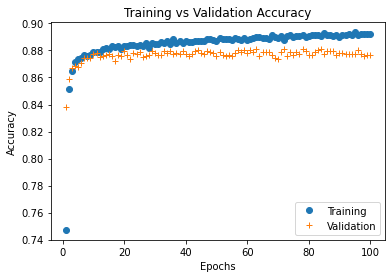

In [113]:
plt.plot(epochs, tra_acc, 'o', label='Training')
plt.plot(epochs, val_acc, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

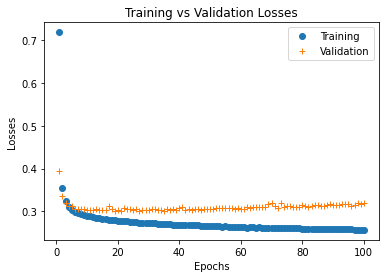

In [114]:
plt.plot(epochs, tra_loss, 'o', label='Training')
plt.plot(epochs, val_loss, '+', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.title('Training vs Validation Losses')
plt.legend()
plt.show()

### <font color='Blue'>What Should you do ?</font>

Let us Experiment. You will guide me. Try a Different Architecture. Different Optimizer ?

### <font color='Blue'>1.10 Extracting Predicted Probabilities </font>

In [115]:
test_df = pd.DataFrame(test_targets)
test_df['actual']= pd.Series(test_df.columns[np.where(test_df!=0)[1]])
test_df

,0,1,2,3,actual
0,0,1,0,0,1
1,0,0,1,0,2
2,0,0,1,0,2
3,0,0,0,1,3
4,0,0,1,0,2
...,...,...,...,...,...
5440,0,0,1,0,2
5441,0,1,0,0,1
5442,0,1,0,0,1
5443,0,1,0,0,1


In [116]:
pred_probs = model.predict(test_data)
pred_class = np.argmax(pred_probs, axis=1)

In [117]:
y_pred_df = pd.DataFrame(pred_probs)
y_pred_df["pred_class"] = pred_class
y_pred_df["act_class"] = test_df['actual']
y_pred_df["sum_prob"] = y_pred_df[0]+y_pred_df[1]+y_pred_df[2]+y_pred_df[3]
y_pred_df

,0,1,2,3,pred_class,act_class,sum_prob
0,3.129230e-19,2.433365e-01,0.014967,9.284174e-08,1,1,0.258303
1,8.992693e-20,2.970732e-04,0.834144,1.719356e-04,2,2,0.834613
2,7.184027e-13,8.869390e-05,0.063681,8.290322e-05,2,2,0.063852
3,3.880673e-11,3.186213e-06,0.437805,5.270420e-01,3,3,0.964851
4,3.648933e-13,7.161914e-07,0.540968,1.086748e-01,2,2,0.649644
...,...,...,...,...,...,...,...
5440,6.476800e-12,2.325676e-06,0.517359,1.022325e-01,2,2,0.619594
5441,8.832196e-19,2.816173e-01,0.012227,1.726160e-06,1,1,0.293846
5442,5.267266e-13,5.755420e-01,0.012995,2.812100e-06,1,1,0.588540
5443,8.394984e-18,7.055866e-01,0.008104,7.926326e-09,1,1,0.713690


### <font color='Blue'>If we sum up the probabilities - What should be the answer ? </font>

### <font color='Blue'>1.11 Classifier Performance </font>

#### <font color='Blue'>1.11 Classifier Performance - Goal Keeper</font>

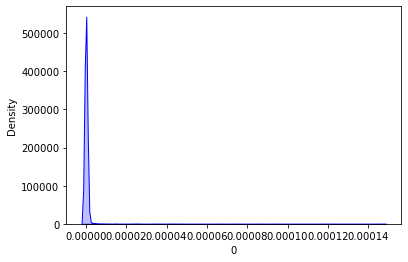

In [118]:
sn.kdeplot( y_pred_df[0], color = 'b', shade=True );

#### <font color='Blue'>1.11 Classifier Performance - Defender</font>

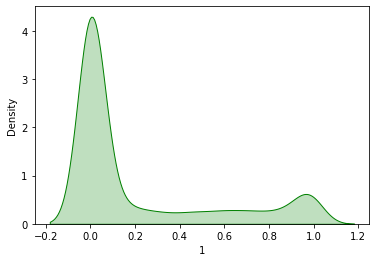

In [119]:
sn.kdeplot( y_pred_df[1], color = 'g', shade=True );

#### <font color='Blue'>1.11 Classifier Performance - Midfielder</font>

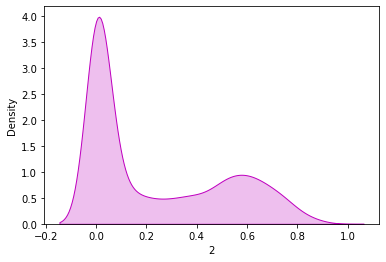

In [120]:
sn.kdeplot( y_pred_df[2], color = 'm', shade=True );

#### <font color='Blue'>1.11 Classifier Performance - Forward</font>

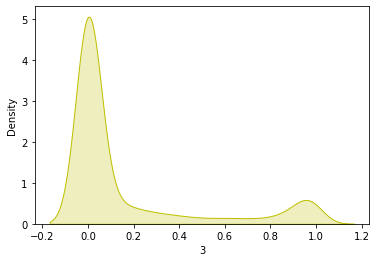

In [121]:
sn.kdeplot( y_pred_df[3], color = 'y', shade=True );

### <font color='Blue'>1.12 Performance Measures from Confusion Matrix </font>

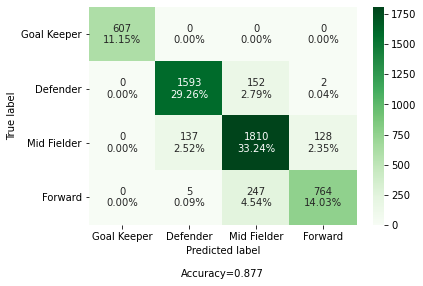

In [122]:
from confusion_matrix import make_confusion_matrix
cf_matrix = metrics.confusion_matrix(y_pred_df.act_class, y_pred_df.pred_class)
labels = ["TN","FP","FN","TP"]
categories = ["Goal Keeper","Defender","Mid Fielder","Forward"]
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      cmap="Greens")

In [123]:
print( metrics.classification_report( y_pred_df.act_class, y_pred_df.pred_class ) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       607
           1       0.92      0.91      0.91      1747
           2       0.82      0.87      0.85      2075
           3       0.85      0.75      0.80      1016

    accuracy                           0.88      5445
   macro avg       0.90      0.88      0.89      5445
weighted avg       0.88      0.88      0.88      5445



### <font color='Blue'>Conclusion</font>

Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural 
network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will 
likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, 
i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry 
about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data 
never-seen-before. Make sure to always monitor performance on data that is outside of the training set.

### <font color='Blue'>Feature Importance Using Shap</font>

For information of Shapley Values, See: https://towardsdatascience.com/shap-explained-the-way-i-wish-someone-explained-it-to-me-ab81cc69ef30

In [124]:
#Run pip install shap before importing shap
import shap

In [125]:
explainer = shap.KernelExplainer(model.predict,shap.sample(train_data,1000))

In [126]:
shap_values = explainer.shap_values(shap.sample(test_data,100),nsamples=200)

  0%|          | 0/100 [00:00<?, ?it/s]

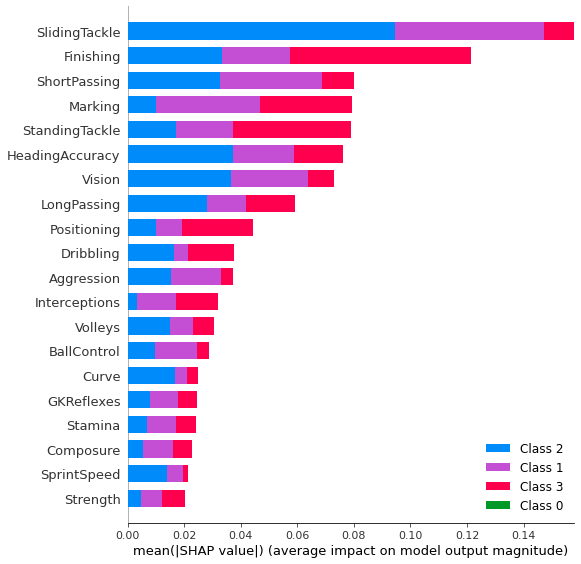

In [127]:
shap.summary_plot(shap_values,test_data,feature_names=X_features)

Each point of every row is a record of the test dataset. The features are sorted from the most important one to the less important. 